https://blog.floydhub.com/colorizing-b-w-photos-with-neural-networks/

In [2]:
import os
import glob
import cv2
import time
import random
import webbrowser
import numpy as np
import pandas as pd
from numpy import reshape
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import savefig

from cv2 import imread, imwrite
import tensorflow as tf
#from tensorflow.keras import datasets, layers, models
import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose, Flatten, Reshape
from tensorflow.keras.layers import Input, Activation, Dense, Dropout, Flatten, InputLayer, BatchNormalization, Input, RepeatVector, concatenate
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.callbacks import TensorBoard, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K

from skimage import color
from skimage.io import imsave
from skimage.transform import resize
from skimage.io import imsave, imread, imshow
from skimage.color import rgb2lab, lab2rgb, rgb2gray, gray2rgb

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function       #repasar funcion y explicar en exposicion

#import tensorflow.compat.v1 as tf
#tf.disable_v2_behavior()

In [3]:
rgb = []
for filename in os.listdir('Layers/'):
    rgb.append(img_to_array(load_img('Layers/'+filename)))

In [4]:
def print_image_summary(image, labels):
    
    print('--------------')
    print('Image Details:')
    print('--------------')
    print(f'Image dimensions: {image.shape}')
    print('Channels:')
    
    if len(labels) == 1:
        image = image[..., np.newaxis]
        
    for i, lab in enumerate(labels):
        min_val = np.min(image[:,:,i])
        max_val = np.max(image[:,:,i])
        print(f'{lab} : min={min_val:.4f}, max={max_val:.4f}')

In [5]:
print_image_summary(rgb[0], ['R', 'G', 'B'])

--------------
Image Details:
--------------
Image dimensions: (410, 750, 3)
Channels:
R : min=7.0000, max=255.0000
G : min=0.0000, max=255.0000
B : min=0.0000, max=255.0000


<ipython-input-11-cd8014832fb3>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


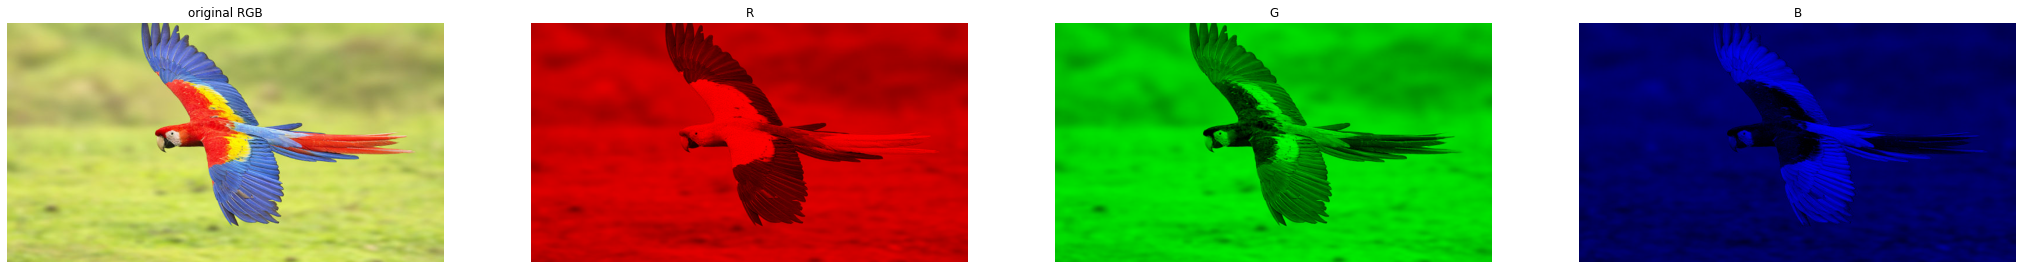

In [11]:
fig, ax = plt.subplots(1, 4, figsize = (36, 50))
ax[0].imshow(rgb[0]/255.0) 
ax[0].axis('off')
ax[0].set_title('original RGB')
for i, lab in enumerate(['R','G','B'], 1):
    temp = np.zeros(rgb[0].shape)
    temp[:,:,i - 1] = rgb[0][:,:,i - 1]
    ax[i].imshow(temp/255.0) 
    ax[i].axis("off")
    ax[i].set_title(lab)
    fig.show()
    fig.savefig('transformed\\Rgb_Macaw')

In [6]:
labs = []
for x in rgb:
    x = rgb2lab(x / 255)
    labs.append(x)

In [7]:
print_image_summary(labs[0], ['L', 'a', 'b'])

--------------
Image Details:
--------------
Image dimensions: (410, 750, 3)
Channels:
L : min=1.9556, max=98.4003
a : min=-39.4981, max=79.7991
b : min=-72.6837, max=94.3871


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
C:\Users\Gman\AppData\Roaming\Python\Python38\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
<ipython-input-8-10d004385558>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


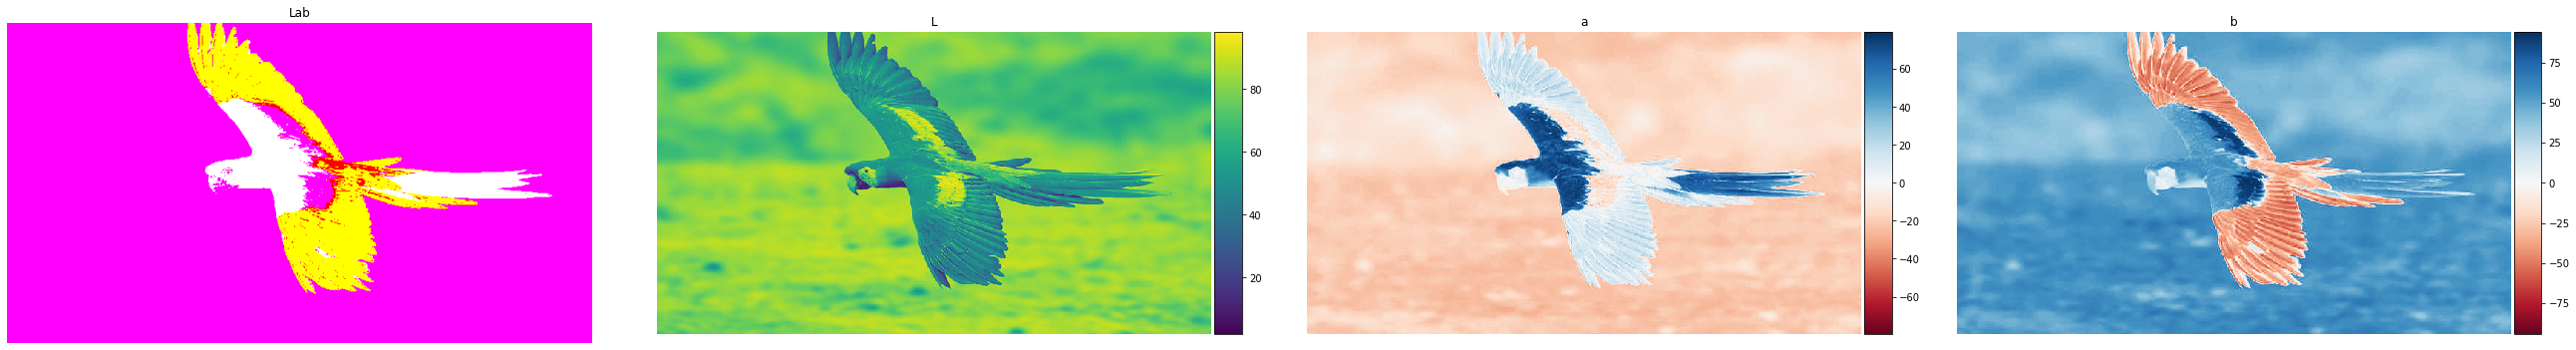

In [8]:
fig, ax = plt.subplots(1, 4, figsize = (36, 50))
ax[0].imshow(labs[0]) 
ax[0].axis('off')
ax[0].set_title('Lab')
for i, col in enumerate(['L', 'a', 'b'], 1):
    imshow(labs[0][:, :, i-1], ax=ax[i])
    ax[i].axis('off')
    ax[i].set_title(col)
    fig.show()
    fig.savefig('transformed\\Lab_Macaw')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
<ipython-input-9-36c8bdd0b164>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


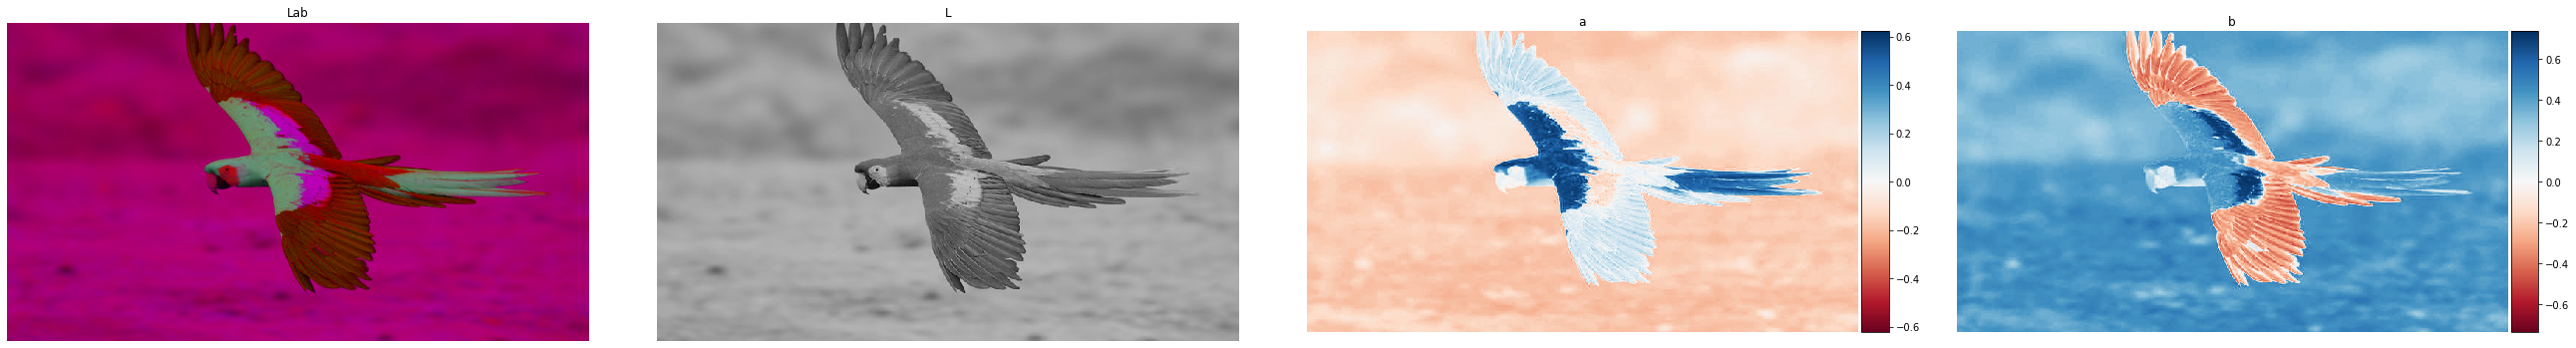

In [9]:
lab2 = labs[0] / 128
fig, ax = plt.subplots(1, 4, figsize = (36, 50))
ax[0].imshow(lab2) 
ax[0].axis('off')
ax[0].set_title('Lab')
for i, col in enumerate(['L', 'a', 'b'], 1):
    imshow(lab2[:, :, i-1], ax=ax[i])
    ax[i].axis('off')
    ax[i].set_title(col)
    fig.show()
    fig.savefig('transformed\\Lab_Grey_Macaw')

In [10]:
in_hsv_h = color.convert_colorspace(rgb[0], 'RGB', 'HSV')
in_hsv_s = in_hsv_h.copy()
in_hsv_v = in_hsv_h.copy()

for i in range(in_hsv_h.shape[0]):
    in_hsv_h[i,:,0] = np.sort(in_hsv_h[i,:,0])
    in_hsv_s[i,:,1] = np.sort(in_hsv_s[i,:,1])
    in_hsv_v[i,:,2] = np.sort(in_hsv_v[i,:,2])

imsave('testing-sorted-hue.png', (color.convert_colorspace(in_hsv_h, 'HSV', 'RGB')*255).astype(np.uint8))
imsave('testing-sorted-saturation.png', (color.convert_colorspace(in_hsv_s, 'HSV', 'RGB')*255).astype(np.uint8))